# Prerequisites

In [1]:
import os, sys

import numpy as np
import tqdm
import torch

/home/marco/miniconda3/envs/nlp2022-hw2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Important paths for the notebook:

In [2]:
app_root = '../../../../'
test_name = 'test3'
datasets_path = os.path.join(app_root, 'data')
model_dir_path = os.path.join(app_root, 'model', test_name)

datasets_paths = {}
for lang in os.listdir(datasets_path):
    dataset_lang_path = os.path.join(datasets_path, lang)
    if os.path.isdir(dataset_lang_path):
        datasets_paths[lang] = {}
        for d_type in os.listdir(dataset_lang_path):
            d_name = d_type.split('.')[0]
            datasets_paths[lang][d_name] = os.path.join(dataset_lang_path, d_type)

In [3]:
sys.path.append('../../../')

%load_ext autoreload
%autoreload 2

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Setting the seed for reproducibility:

In [4]:
SEED = 28

# random.seed(SEED) # not used
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:
global_params = {
    'batch_size': 32,
    'PAD_TOKEN': '<pad>',
    'UNK_TOKEN': '<unk>',
    'transformer_name': "bert-base-cased",
}

This time, I will try to implement a predicate disambiguation model. The dataset now will not process predicates as it did in previous tests (thanks to split_predicates = False)

# Dataset

I will use BERT

In [6]:
from stud.modelsTests.dataset.SRLDataset_transformer import SRLDataset_transformer

In [7]:
dataset_train_en = SRLDataset_transformer(  datasets_paths['EN']['train'], 
                                            tokenizer = global_params['transformer_name'],
                                            baselines_file_path = os.path.join(app_root,'data/baselines.json'),
                                            split_predicates = False)
dataset_train_es = SRLDataset_transformer(  datasets_paths['ES']['train'], 
                                            tokenizer = dataset_train_en.tokenizer,
                                            labels = dataset_train_en.labels,
                                            split_predicates = False)
dataset_train_fr = SRLDataset_transformer(  datasets_paths['FR']['train'], 
                                            tokenizer = dataset_train_en.tokenizer,
                                            labels = dataset_train_en.labels,
                                            split_predicates = False)

In [8]:
from collections import Counter
import json

id_to_predicates_internet = ['_'] + ["ABSORB","ABSTAIN_AVOID_REFRAIN","ACCOMPANY","ACCUSE","ACHIEVE","ADD","ADJUST_CORRECT","AFFECT","AFFIRM","AGREE_ACCEPT","AIR","ALLY_ASSOCIATE_MARRY","ALTERNATE","AMASS","AMELIORATE","ANALYZE","ANSWER","APPEAR","APPLY","APPROVE_PRAISE","ARGUE-IN-DEFENSE","AROUSE_WAKE_ENLIVEN","ARRIVE","ASCRIBE","ASK_REQUEST","ASSIGN-SMT-TO-SMN","ATTACH","ATTACK_BOMB","ATTEND","ATTRACT_SUCK","AUTHORIZE_ADMIT","AUTOMATIZE","AUX_MOD","BE-LOCATED_BASE","BEFRIEND","BEGIN","BEHAVE","BELIEVE","BEND","BENEFIT_EXPLOIT","BETRAY","BEWITCH","BID","BLIND","BORDER","BREAK_DETERIORATE","BREATH_BLOW","BRING","BULGE-OUT","BURDEN_BEAR","BURN","BURY_PLANT","BUY","CAGE_IMPRISON","CALCULATE_ESTIMATE","CANCEL_ELIMINATE","CARRY_TRANSPORT","CARRY-OUT-ACTION","CASTRATE","CATCH","CATCH_EMBARK","CAUSE-MENTAL-STATE","CAUSE-SMT","CAVE_CARVE","CELEBRATE_PARTY","CHANGE_SWITCH","CHANGE-APPEARANCE/STATE","CHANGE-HANDS","CHANGE-TASTE","CHARGE","CHASE","CHOOSE","CIRCULATE_SPREAD_DISTRIBUTE","CITE","CLOSE","CLOUD_SHADOW_HIDE","CO-OPT","COLOR","COMBINE_MIX_UNITE","COME-AFTER_FOLLOW-IN-TIME","COME-FROM","COMMUNE","COMMUNICATE_CONTACT","COMMUNIZE","COMPARE","COMPENSATE","COMPETE","COMPLEXIFY","CONQUER","CONSIDER","CONSUME_SPEND","CONTAIN","CONTINUE","CONTRACT-AN-ILLNESS_INFECT","CONVERT","COOK","COOL","COPY","CORRELATE","CORRODE_WEAR-AWAY_SCRATCH","CORRUPT","COST","COUNT","COURT","COVER_SPREAD_SURMOUNT","CREATE_MATERIALIZE","CRITICIZE","CRY","CUT","DANCE","DEBASE_ADULTERATE","DECEIVE","DECIDE_DETERMINE","DECREE_DECLARE","DEFEAT","DELAY","DERIVE","DESTROY","DEVELOP_AGE","DIET","DIM","DIP_DIVE","DIRECT_AIM_MANEUVER","DIRTY","DISAPPEAR","DISBAND_BREAK-UP","DISCARD","DISCUSS","DISLIKE","DISMISS_FIRE-SMN","DISTINGUISH_DIFFER","DIVERSIFY","DIVIDE","DOWNPLAY_HUMILIATE","DRESS_WEAR","DRINK","DRIVE-BACK","DROP","DRY","EARN","EAT_BITE","EMBELLISH","EMCEE","EMIT","EMPHASIZE","EMPTY_UNLOAD","ENCLOSE_WRAP","ENDANGER","ENJOY","ENTER","ESTABLISH","EXCRETE","EXEMPT","EXHAUST","EXIST_LIVE","EXIST-WITH-FEATURE","EXPLAIN","EXPLODE","EXTEND","EXTRACT","FACE_CHALLENGE","FACIAL-EXPRESSION","FAIL_LOSE","FAKE","FALL_SLIDE-DOWN","FEEL","FIGHT","FILL","FIND","FINISH_CONCLUDE_END","FIT","FLATTEN_SMOOTHEN","FLATTER","FLOW","FLY","FOCUS","FOLLOW_SUPPORT_SPONSOR_FUND","FOLLOW-IN-SPACE","FORGET","FRUSTRATE_DISAPPOINT","FUEL","GENERATE","GIVE_GIFT","GIVE-BIRTH","GIVE-UP_ABOLISH_ABANDON","GO-FORWARD","GROUND_BASE_FOUND","GROUP","GROW_PLOW","GUARANTEE_ENSURE_PROMISE","GUESS","HANG","HAPPEN_OCCUR","HARMONIZE","HAVE-A-FUNCTION_SERVE","HAVE-SEX","HEAR_LISTEN","HEAT","HELP_HEAL_CARE_CURE","HIRE","HIT","HOLE_PIERCE","HOST_MEAL_INVITE","HUNT","HURT_HARM_ACHE","IMAGINE","IMPLY","INCITE_INDUCE","INCLINE","INCLUDE-AS","INCREASE_ENLARGE_MULTIPLY","INFER","INFLUENCE","INFORM","INSERT","INTERPRET","INVERT_REVERSE","ISOLATE","JOIN_CONNECT","JOKE","JUMP","JUSTIFY_EXCUSE","KILL","KNOCK-DOWN","KNOW","LAND_GET-OFF","LAUGH","LEAD_GOVERN","LEARN","LEAVE_DEPART_RUN-AWAY","LEAVE-BEHIND","LEND","LIBERATE_ALLOW_AFFORD","LIE","LIGHT_SHINE","LIGHTEN","LIKE","LOAD_PROVIDE_CHARGE_FURNISH","LOCATE-IN-TIME_DATE","LOSE","LOWER","LURE_ENTICE","MAKE-A-SOUND","MAKE-RELAX","MANAGE","MATCH","MEAN","MEASURE_EVALUATE","MEET","MESS","METEOROLOGICAL","MISS_OMIT_LACK","MISTAKE","MOUNT_ASSEMBLE_PRODUCE","MOVE-BACK","MOVE-BY-MEANS-OF","MOVE-ONESELF","MOVE-SOMETHING","NAME","NEGOTIATE","NOURISH_FEED","OBEY","OBLIGE_FORCE","OBTAIN","ODORIZE","OFFEND_DISESTEEM","OFFER","OPEN","OPERATE","OPPOSE_REBEL_DISSENT","ORDER","ORGANIZE","ORIENT","OVERCOME_SURPASS","OVERLAP","PAINT","PARDON","PARTICIPATE","PAY","PERCEIVE","PERFORM","PERMEATE","PERSUADE","PLAN_SCHEDULE","PLAY_SPORT/GAME","POPULATE","POSSESS","PRECEDE","PRECLUDE_FORBID_EXPEL","PREPARE","PRESERVE","PRESS_PUSH_FOLD","PRETEND","PRINT","PROMOTE","PRONOUNCE","PROPOSE","PROTECT","PROVE","PUBLICIZE","PUBLISH","PULL","PUNISH","PUT_APPLY_PLACE_PAVE","QUARREL_POLEMICIZE","RAISE","REACH","REACT","READ","RECALL","RECEIVE","RECOGNIZE_ADMIT_IDENTIFY","RECORD","REDUCE_DIMINISH","REFER","REFLECT","REFUSE","REGRET_SORRY","RELY","REMAIN","REMEMBER","REMOVE_TAKE-AWAY_KIDNAP","RENEW","REPAIR_REMEDY","REPEAT","REPLACE","REPRESENT","REPRIMAND","REQUIRE_NEED_WANT_HOPE","RESERVE","RESIGN_RETIRE","RESIST","REST","RESTORE-TO-PREVIOUS/INITIAL-STATE_UNDO_UNWIND","RESTRAIN","RESULT_CONSEQUENCE","RETAIN_KEEP_SAVE-MONEY","REVEAL","RISK","ROLL","RUN","SATISFY_FULFILL","SCORE","SEARCH","SECURE_FASTEN_TIE","SEE","SEEM","SELL","SEND","SEPARATE_FILTER_DETACH","SETTLE_CONCILIATE","SEW","SHAPE","SHARE","SHARPEN","SHOOT_LAUNCH_PROPEL","SHOUT","SHOW","SIGN","SIGNAL_INDICATE","SIMPLIFY","SIMULATE","SING","SLEEP","SLOW-DOWN","SMELL","SOLVE","SORT_CLASSIFY_ARRANGE","SPEAK","SPEED-UP","SPEND-TIME_PASS-TIME","SPILL_POUR","SPOIL","STABILIZE_SUPPORT-PHYSICALLY","START-FUNCTIONING","STAY_DWELL","STEAL_DEPRIVE","STOP","STRAIGHTEN","STRENGTHEN_MAKE-RESISTANT","STUDY","SUBJECTIVE-JUDGING","SUBJUGATE","SUMMARIZE","SUMMON","SUPPOSE","SWITCH-OFF_TURN-OFF_SHUT-DOWN","TAKE","TAKE-A-SERVICE_RENT","TAKE-INTO-ACCOUNT_CONSIDER","TAKE-SHELTER","TASTE","TEACH","THINK","THROW","TIGHTEN","TOLERATE","TOUCH","TRANSLATE","TRANSMIT","TRAVEL","TREAT","TREAT-WITH/BY","TRY","TURN_CHANGE-DIRECTION","TYPE","UNDERGO-EXPERIENCE","UNDERSTAND","UNFASTEN_UNFOLD","USE","VERIFY","VIOLATE","VISIT",'WORK','WASH_CLEAN','WAIT','WARN','WELCOME','WATCH_LOOK-OUT','WIN','WORSEN','WRITE']


f = open(os.path.join(app_root,'data/baselines.json'))
baselines = json.load(f)
f.close()

id_to_predicates_baselines = ['_'] + sorted(list(Counter(baselines['predicate_disambiguation'].values())))

id_to_predicates_dataset = Counter()
for e in dataset_train_en:
    for p in e['predicates']:
        id_to_predicates_dataset[p] += 1
id_to_predicates_dataset = list(id_to_predicates_dataset)

In [9]:
len(id_to_predicates_internet), len(id_to_predicates_baselines), len(id_to_predicates_dataset)

(423, 235, 302)

In [10]:
print( 'elements that dataset has insted of verbatlas:', len(list(set(id_to_predicates_dataset) - set(id_to_predicates_internet))) )
print( 'elements that dataset has insted of baselines:', len(list(set(id_to_predicates_dataset) - set(id_to_predicates_baselines))) )
print( 'elements that verbatlas has insted of dataset:', len(list(set(id_to_predicates_internet) - set(id_to_predicates_dataset))) )
print( 'elements that verbatlas has insted of baselines:', len(list(set(id_to_predicates_internet) - set(id_to_predicates_baselines))) )

elements that dataset has insted of verbatlas: 0
elements that dataset has insted of baselines: 69
elements that verbatlas has insted of dataset: 121
elements that verbatlas has insted of baselines: 189


In [11]:
list(set(id_to_predicates_dataset) - set(id_to_predicates_internet))

[]

In [12]:
SRLDataset_transformer.save_dict(
    os.path.join(model_dir_path, 'labels.npy'), 
    dataset_train_en.labels)

In [13]:
dataset_dev_en = SRLDataset_transformer(datasets_paths['EN']['dev'], 
                                        tokenizer = dataset_train_en.tokenizer,
                                        labels = dataset_train_en.labels,
                                        split_predicates = False)

In [14]:
next(iter(dataset_train_en)).keys()

dict_keys(['dependency_heads', 'dependency_relations', 'lemmas', 'pos_tags', 'predicates', 'roles', 'words'])

In [15]:
global_params.update({ 
    'n_roles_labels': len(dataset_train_en.labels['id_to_roles']),
    'n_predicates_labels': len(dataset_train_en.labels['id_to_predicates'])
})

Saving global variables...

In [16]:
np.save(os.path.join(model_dir_path, 'global_params.npy'), global_params)

# DataLoader

In [17]:
from torch.utils.data import DataLoader

In [18]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
num_workers = 4

In [19]:
dataloader_train_en = DataLoader(
    dataset_train_en,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_train_en.create_collate_fn(),
    num_workers=num_workers,
    shuffle=True,
)

In [20]:
dataloader_dev_en = DataLoader(
    dataset_dev_en,
    batch_size=global_params['batch_size'],
    collate_fn=dataset_dev_en.create_collate_fn(),
    num_workers=num_workers,
    shuffle=False,
)

In [21]:
for e in dataloader_dev_en:
    ex_in = e
    break

In [22]:
ex_in.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'matrix_subwords', 'output_mask', 'predicates', 'pos_tags', 'predicates_binary'])

In [23]:
print(ex_in['input_ids'][0], ex_in['input_ids'].shape)
print(ex_in['output_mask'][0], ex_in['output_mask'].shape)

tensor([  101,  1109,  2341, 18029,  1116,  1115,  1103,  1426,  1710,  2653,
         1167,  2209,  1106, 14516,  2316, 17030,  6185,  1103,  1484,  1104,
         1103,  1644,  7742,  6421,   117,  2699,  1105,  4223,  2088,  1164,
         1769,  2266,   119,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [24]:
print(ex_in['predicates'][0], ex_in['predicates'].shape)
print(ex_in['predicates_binary'][0], ex_in['predicates_binary'].shape)
print(ex_in['pos_tags'][0], ex_in['pos_tags'].shape)

tensor([ -1,   0,   0, 297,  -1,   0,   0,   0,   0, 183,   0,   0,   0, 393,
         -1,  -1,  -1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1]) torch.Size([32, 131])
tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  

In [25]:
torch.set_printoptions(edgeitems=80)
print(ex_in['matrix_subwords'].shape,'\n' , ex_in['matrix_subwords'][0][0:6,:10]) # word_ids[0:6] = [None, 0, 1, 2, 2, 3]
torch.set_printoptions(edgeitems=3)

torch.Size([32, 131, 131]) 
 tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])


# Printing model

In [26]:
from stud.modelsTests.utils.print_infos import *

# Training the disambiguation model

In [46]:
loss_function = torch.nn.CrossEntropyLoss(ignore_index = dataset_train_en.labels['predicates_pad_id']) # !

This first test will use the position of the predicates (so, doing only disambiguation)

In [47]:
from stud.modelsTests.model_pred_iden_dis_part.Model_pid_transformer_simple import PredIdenDisModel
import torch.optim as optim

final_model = PredIdenDisModel(
    language = 'EN',
    device = device,
    model_load_weights = False,
    loss_fn = loss_function,
    fine_tune_transformer = True,
    has_predicates_positions = True, # !
    has_pos_tags = False,
)

optimizer = optim.SGD(final_model.model.parameters(), lr=0.0016, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.0016)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [48]:
print_summary(final_model.model)

Net_pid_transformer_simple(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

In [49]:
from stud.modelsTests.utils.Trainer_pid_transformer_simple import Trainer_pid_transformer_simple

final_model.model.eval()
final_model.model.to(device)

trainer = Trainer_pid_transformer_simple()

with torch.no_grad():
    ex_out_dict = trainer.compute_forward(
        final_model.model, ex_in, device, optimizer = None)

ex_p_f = final_model.model.get_indices(ex_out_dict['predictions'])

print(
    'labels:','\n',
    ex_out_dict['labels'].detach().cpu().tolist()[0],'\n',
    'predictions:','\n',
    ex_p_f.detach().cpu().tolist()[0])

labels: 
 [-1, 0, 0, 297, -1, 0, 0, 0, 0, 183, 0, 0, 0, 393, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1] 
 predictions: 
 [136, 136, 136, 394, 136, 136, 136, 136, 136, 65, 136, 136, 136, 120, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 

In [50]:
history = {}

In [51]:
from stud.modelsTests.utils.Trainer_pid_transformer_simple import Trainer_pid_transformer_simple

trainer = Trainer_pid_transformer_simple()

history = trainer.train(
    final_model, optimizer, dataloader_train_en, dataloader_dev_en,
    epochs=60, device=device,
    save_best=True, 
    min_score=0.83,
    save_path_name=os.path.join(model_dir_path, 'pd_transformer_weights.pth'),
    saved_history=history
)

Epoch   0 => avg_loss: 4.882548
# Validation loss => 3.587312 | f1-score: arg_iden = 1.000000 arg_class = 0.462985 #
Epoch   1 => avg_loss: 2.534206
# Validation loss => 1.540962 | f1-score: arg_iden = 0.999608 arg_class = 0.636364 #
Epoch   2 => avg_loss: 1.018167
# Validation loss => 0.612081 | f1-score: arg_iden = 0.999804 arg_class = 0.738100 #
Epoch   3 => avg_loss: 0.474165
# Validation loss => 0.338304 | f1-score: arg_iden = 1.000000 arg_class = 0.784567 #
Epoch   4 => avg_loss: 0.297380
# Validation loss => 0.233574 | f1-score: arg_iden = 1.000000 arg_class = 0.802977 #
Epoch   5 => avg_loss: 0.218541
# Validation loss => 0.180876 | f1-score: arg_iden = 1.000000 arg_class = 0.819428 #
Epoch   6 => avg_loss: 0.174054
# Validation loss => 0.150098 | f1-score: arg_iden = 1.000000 arg_class = 0.827262 #
Epoch   7 => avg_loss: 0.144597
# Validation loss => 0.130069 | f1-score: arg_iden = 1.000000 arg_class = 0.833137 #
----- Best value obtained, saving model -----
Epoch   8 => avg_l

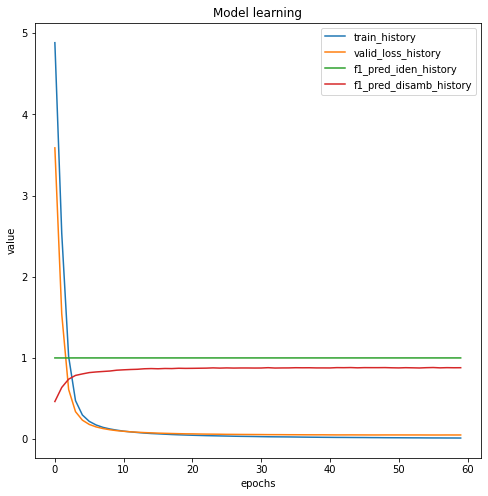

In [52]:
display_history(history)

# Training the predicate identification and disambiguation model

In [34]:
loss_function = torch.nn.CrossEntropyLoss(ignore_index = dataset_train_en.labels['predicates_pad_id']) # !

Here, I won't use the position of the predicates:

In [35]:
from stud.modelsTests.model_pred_iden_dis_part.Model_pid_transformer_simple import PredIdenDisModel
import torch.optim as optim

final_model = PredIdenDisModel(
    language = 'EN',
    device = device,
    model_load_weights = False,
    loss_fn = loss_function,
    fine_tune_transformer = True,
    has_predicates_positions = False, # !
    has_pos_tags = False,
)

optimizer = optim.SGD(final_model.model.parameters(), lr=0.0016, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.0016)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [36]:
print_summary(final_model.model)

Net_pid_transformer_simple(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

In [37]:
history = {}

In [38]:
from stud.modelsTests.utils.Trainer_pid_transformer_simple import Trainer_pid_transformer_simple

trainer = Trainer_pid_transformer_simple()

history = trainer.train(
    final_model, optimizer, dataloader_train_en, dataloader_dev_en,
    epochs=60, device=device,
    save_best=True, 
    min_score=0.8,
    save_path_name=os.path.join(model_dir_path, 'pid_transformer_weights.pth'),
    saved_history=history
)

Epoch   0 => avg_loss: 0.658404
# Validation loss => 0.346285 | f1-score: arg_iden = 0.653285 arg_class = 0.174140 #
Epoch   1 => avg_loss: 0.337030
# Validation loss => 0.256578 | f1-score: arg_iden = 0.885626 arg_class = 0.434333 #
Epoch   2 => avg_loss: 0.259282
# Validation loss => 0.185440 | f1-score: arg_iden = 0.915064 arg_class = 0.597756 #
Epoch   3 => avg_loss: 0.200257
# Validation loss => 0.146750 | f1-score: arg_iden = 0.921518 arg_class = 0.673555 #
Epoch   4 => avg_loss: 0.164171
# Validation loss => 0.124115 | f1-score: arg_iden = 0.910602 arg_class = 0.718021 #
Epoch   5 => avg_loss: 0.141014
# Validation loss => 0.109407 | f1-score: arg_iden = 0.933621 arg_class = 0.753339 #
Epoch   6 => avg_loss: 0.122518
# Validation loss => 0.101071 | f1-score: arg_iden = 0.930596 arg_class = 0.770283 #
Epoch   7 => avg_loss: 0.110568
# Validation loss => 0.094829 | f1-score: arg_iden = 0.930840 arg_class = 0.781999 #
Epoch   8 => avg_loss: 0.099414
# Validation loss => 0.088198 | 

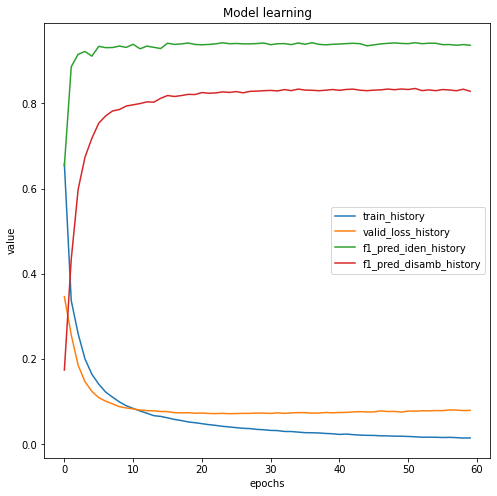

In [39]:
display_history(history)

# Training the predicate identification and disambiguation model with POS tags

In [35]:
loss_function = torch.nn.CrossEntropyLoss(ignore_index = dataset_train_en.labels['predicates_pad_id']) # !

Here, I will use POS tags

In [36]:
from stud.modelsTests.model_pred_iden_dis_part.Model_pid_transformer_simple import PredIdenDisModel
import torch.optim as optim

final_model = PredIdenDisModel(
    language = 'EN',
    device = device,
    model_load_weights = False,
    loss_fn = loss_function,
    fine_tune_transformer = True,
    has_predicates_positions = False, # !
    has_pos_tags = True, # !
)

optimizer = optim.SGD(final_model.model.parameters(), lr=0.0016, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.0016)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [37]:
print_summary(final_model.model)

Net_pid_transformer_simple(
  (transformer_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

In [38]:
history = {}

In [39]:
from stud.modelsTests.utils.Trainer_pid_transformer_simple import Trainer_pid_transformer_simple

trainer = Trainer_pid_transformer_simple()

history = trainer.train(
    final_model, optimizer, dataloader_train_en, dataloader_dev_en,
    epochs=60, device=device,
    save_best=True, 
    min_score=0.85,
    save_path_name=os.path.join(model_dir_path, 'pid_transformer_pos_weights.pth'),
    saved_history=history
)

Epoch   0 => avg_loss: 0.568608
# Validation loss => 0.237868 | f1-score: arg_iden = 0.907980 arg_class = 0.471906 #
Epoch   1 => avg_loss: 0.232536
# Validation loss => 0.159814 | f1-score: arg_iden = 0.923015 arg_class = 0.646432 #
Epoch   2 => avg_loss: 0.172666
# Validation loss => 0.124831 | f1-score: arg_iden = 0.930619 arg_class = 0.713975 #
Epoch   3 => avg_loss: 0.140131
# Validation loss => 0.107375 | f1-score: arg_iden = 0.931034 arg_class = 0.747257 #
Epoch   4 => avg_loss: 0.118856
# Validation loss => 0.094291 | f1-score: arg_iden = 0.934151 arg_class = 0.774372 #
Epoch   5 => avg_loss: 0.104433
# Validation loss => 0.087829 | f1-score: arg_iden = 0.935528 arg_class = 0.786204 #
Epoch   6 => avg_loss: 0.094229
# Validation loss => 0.082491 | f1-score: arg_iden = 0.937609 arg_class = 0.800000 #
Epoch   7 => avg_loss: 0.085572
# Validation loss => 0.077962 | f1-score: arg_iden = 0.938474 arg_class = 0.806464 #
Epoch   8 => avg_loss: 0.078559
# Validation loss => 0.075070 | 

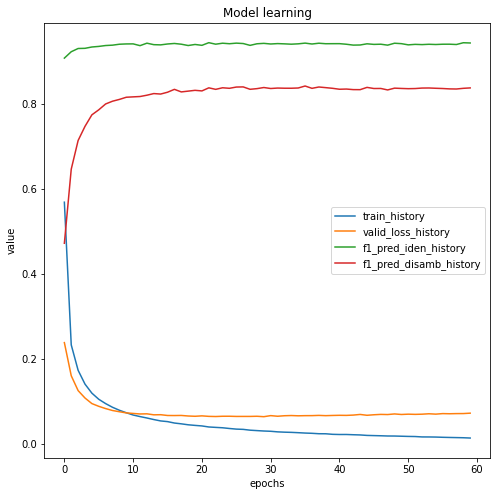

In [40]:
display_history(history)

The result is nearly the same

# Testing

In [41]:
test_input = {
    "dependency_heads": [3,3,0,7,6,7,3,9,7,11,7,15,15,15,11,18,18,15,3],
    "dependency_relations": ["nsubj","advmod","root","mark","det","nsubj","ccomp","amod","obj","mark","advcl","det","amod","amod","obj","case","compound","nmod","punct"],
    "lemmas": ["it","also","recommend","that","the","authority","take","appropriate","measure","to","meet","the","specific","educational","need","of","Roma","child","."],
    "pos_tags": ["PRON","ADV","VERB","SCONJ","DET","NOUN","VERB","ADJ","NOUN","PART","VERB","DET","ADJ","ADJ","NOUN","ADP","PROPN","NOUN","PUNCT"],
    "predicates": ["_","_","PROPOSE","_","_","_","CARRY-OUT-ACTION","_","_","_","SATISFY_FULFILL","_","_","_","_","_","_","_","_"], 
    "words": [
        "It","also","recommends","that","the","authorities","take","appropriate","measures","to",
        "meet","the","specific","educational","needs","of","Roma","children","."]
}

final_test_model = PredIdenDisModel(language='EN', device=device)
test_out = final_test_model.predict(test_input)
print(test_out)

{'predicates': ['_', '_', 'PROPOSE', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_']}


# Final Model test

In [ ]:
from stud.modelsTests.model_total.final_model import FinalModel

In [70]:
test_input = {
    "lemmas": ["it","also","recommend","that","the","authority","take","appropriate","measure","to","meet","the","specific","educational","need","of","Roma","child","."],
    "predicates": ["_","_","PROPOSE","_","_","_","CARRY-OUT-ACTION","_","_","_","SATISFY_FULFILL","_","_","_","_","_","_","_","_"], 
    "words": [
        "It","also","recommends","that","the","authorities","take","appropriate","measures","to",
        "meet","the","specific","educational","needs","of","Roma","children","."]
}

fm_total = FinalModel(language='EN', device=device, model_type = 0)

print(fm_total.predict(test_input))

{'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}


In [75]:
test_input = {
    "lemmas": ["it","also","recommend","that","the","authority","take","appropriate","measure","to","meet","the","specific","educational","need","of","Roma","child","."],
    "predicates": [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0], 
    "words": [
        "It","also","recommends","that","the","authorities","take","appropriate","measures","to",
        "meet","the","specific","educational","needs","of","Roma","children","."]
}

fm_total = FinalModel(language='EN', device=device, model_type = 1)

print(fm_total.predict(test_input))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}


In [71]:
test_input = {
    "lemmas": ["it","also","recommend","that","the","authority","take","appropriate","measure","to","meet","the","specific","educational","need","of","Roma","child","."],
    "words": [
        "It","also","recommends","that","the","authorities","take","appropriate","measures","to",
        "meet","the","specific","educational","needs","of","Roma","children","."]
}

fm_total = FinalModel(language='EN', device=device, model_type = 2)

print(fm_total.predict(test_input))

{'predicates': ['_', '_', 'PROPOSE', '_', '_', '_', 'CARRY-OUT-ACTION', '_', '_', '_', 'SATISFY_FULFILL', '_', '_', '_', '_', '_', '_', '_', '_'], 'roles': {2: ['agent', '_', '_', 'topic', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 6: ['_', '_', '_', '_', '_', 'agent', '_', '_', 'patient', 'goal', '_', '_', '_', '_', '_', '_', '_', '_', '_'], 10: ['_', '_', '_', '_', '_', 'agent', '_', '_', '_', '_', '_', '_', '_', '_', 'theme', '_', '_', '_', '_']}}
